In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import keras
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.utils import plot_model
from keras.layers import Dense, Dropout, Flatten, Conv2D , MaxPooling2D

<ipython-input-3-fd71251b1624>:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 2, i+1)


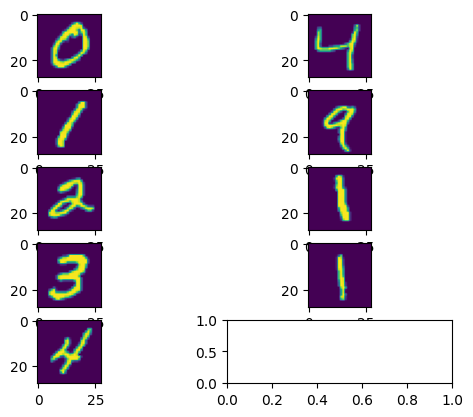

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28)
x_test = x_test.reshape(x_test.shape[0], 28, 28)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

for i in range(10):
  plt.imshow(x_train[i])
  plt.subplot(5, 2, i+1)

In [10]:
x_train /= 255
x_test /= 255
batch_size = 64
epoch = 5
num = 10
model = Sequential()
def cnn_model(optimizer):
  model = Sequential()
  model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = input_shape))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(256, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation ='softmax'))
  model.compile(loss = keras.losses.categorical_crossentropy, optimizer = optimizer, metrics = ['accuracy'])
  model.summary()
  return model
optimizer = ['adagrad', 'adam']
final_model = cnn_model('adam')
plot_model(final_model, to_file = 'mnist model'+ '.jpg', show_shapes = True)
hist = final_model.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, verbose = 1, validation_data = (x_test, y_test))


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 5, 5, 32)          0         
                                                                 
 flatten_4 (Flatten)         (None, 800)             

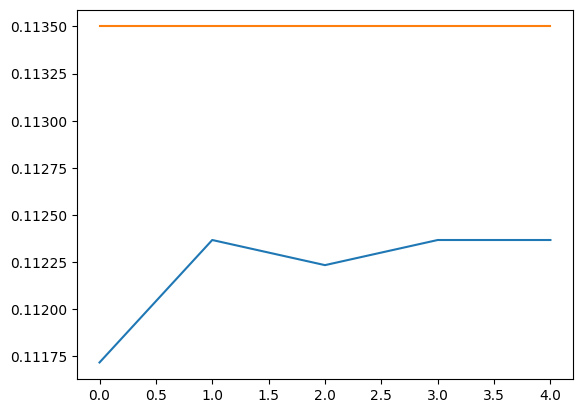

In [11]:
y1 = hist.history['accuracy']
y2 = hist.history['val_accuracy']
plt.plot(y1)
plt.plot(y2)

<ipython-input-14-40dfb8617f79>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  keras.models.save_model(final_model, "mnist.h5", save_format = "h5")


1/1 [==============================] - 0s 227ms/step
predicted label:  1


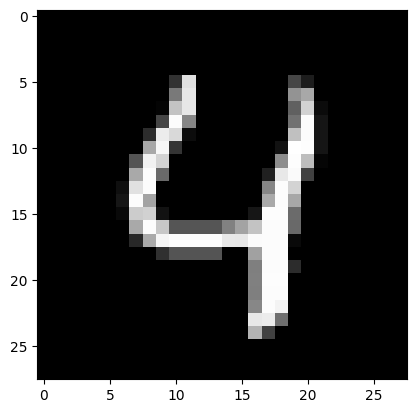

In [14]:
keras.models.save_model(final_model, "mnist.h5", save_format = "h5")
def image_prediction(model, img):
  img = np.reshape(img, (1, 28, 28))
  pred = model.predict(img)
  ans = np.argmax(pred)
  print("predicted label: ", ans)

m = load_model('mnist.h5', compile = False)
image_prediction(m, x_test[4])
plt.imshow(x_test[4], cmap = 'gray')